In [54]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [92]:
df = pd.read_csv('Data.csv')
array = ['Rap', 'Pop','Country','Alternative','Indie','Jazz','Dance','Blues']
df = df.loc[df['genre'].isin(array)]
df = df.drop(['artist_name','track_name','track_id'],axis=1)
df = pd.get_dummies(df)
df.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,...,time_signature_3/4,time_signature_4/4,time_signature_5/4,"bucket_(100000.0, 300000.0]","bucket_(300000.0, 500000.0]","bucket_(500000.0, 700000.0]","bucket_(700000.0, 900000.0]","bucket_(900000.0, 1000000.0]",popular_not-popular,popular_popular
0,242,84,0.5440,0.515,209274,0.479,0.005980,0.1910,-7.458,0.0261,...,0,1,0,1,0,0,0,0,0,1
1,243,86,0.0116,0.464,239507,0.852,0.000000,0.1080,-3.804,0.0670,...,0,1,0,1,0,0,0,0,0,1
2,244,84,0.7950,0.473,209400,0.371,0.000000,0.1090,-10.219,0.0405,...,0,1,0,1,0,0,0,0,0,1
3,245,81,0.6190,0.672,174358,0.588,0.241000,0.0992,-9.573,0.1330,...,0,1,0,1,0,0,0,0,0,1
4,246,79,0.6400,0.545,248467,0.330,0.000007,0.2200,-11.719,0.1640,...,0,1,0,1,0,0,0,0,0,1


In [93]:
X = df.drop(['popularity','popular_not-popular',
       'popular_popular'],axis=1)
y = df['popularity']
X.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'lognorm_duration', 'Count', 'genre_Alternative',
       'genre_Blues', 'genre_Country', 'genre_Dance', 'genre_Indie',
       'genre_Jazz', 'genre_Pop', 'genre_Rap', 'key_A', 'key_A#', 'key_B',
       'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#',
       'key_G', 'key_G#', 'mode_Major', 'mode_Minor', 'time_signature_0/4',
       'time_signature_1/4', 'time_signature_3/4', 'time_signature_4/4',
       'time_signature_5/4', 'bucket_(100000.0, 300000.0]',
       'bucket_(300000.0, 500000.0]', 'bucket_(500000.0, 700000.0]',
       'bucket_(700000.0, 900000.0]', 'bucket_(900000.0, 1000000.0]'],
      dtype='object')

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [95]:
scaler = StandardScaler() 
X_trained = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



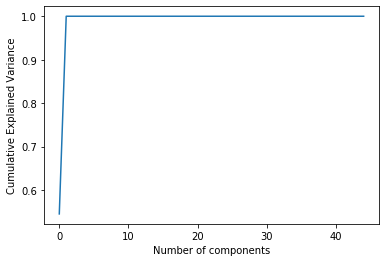

In [59]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
features = range(pca.n_components_)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [63]:
from sklearn import metrics

LR_Model = LinearRegression()
LR_Model.fit(X_train, y_train)
y_pred = LR_Model.predict(X_test)


LR_MAE = metrics.mean_absolute_error(y_test, y_pred)
LR_MSE = metrics.mean_squared_error(y_test, y_pred)
LR_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', LR_MAE)
print('Mean Squared Error:', LR_MSE)
print('Root Mean Squared Error:', LR_RMSE)

cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation cross validation scores: ' +str(cv_scores_std_rf))

Mean Absolute Error: 16.691206081381246
Mean Squared Error: 433.37652561701617
Root Mean Squared Error: 20.817697413907624
Mean cross validation test score: 0.8215244905406905
Mean cross validation train score: 0.8318091739840238
Standard deviation cross validation scores: 0.0028931414326630227


In [99]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.fit(X_test,y_test)
y_pred = RFC_Model.predict(X_test)
RFC_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RFC_Accuracy)
print("Precision:",metrics.precision_score(y_test, y_pred,pos_label='positive',
                                           average='micro'))

RFC_MAE = metrics.mean_absolute_error(y_test, y_pred)
RFC_MSE = metrics.mean_squared_error(y_test, y_pred)
RFC_RMSE  = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:',RFC_MAE )
print('Mean Squared Error:', RFC_MSE)
print('Root Mean Squared Error:', RFC_RMSE)

cv_scores_test= cross_val_score(RFC_Model,X_test,y_test,cv=5)
cv_scores_train= cross_val_score(RFC_Model,X_train,y_train,cv=5)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation cross validation scores: ' +str(cv_scores_std_rf))

Accuracy: 1.0
Precision: 1.0
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean cross validation test score: 0.14930437733288088
Mean cross validation train score: 0.26351418684937816
Standard deviation cross validation scores: 0.005313492807889617


In [100]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
y_pred = KNN_Model.predict(X_test)
KNN_Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(KNN_Accuracy))
print("Precision:",metrics.precision_score(y_test, y_pred,pos_label='positive',
                                           average='micro'))
KNN_MAE = metrics.mean_absolute_error(y_test, y_pred)
KNN_MSE = metrics.mean_squared_error(y_test, y_pred)
KNN_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', KNN_MAE)
print('Mean Squared Error:', KNN_MSE)
print('Root Mean Squared Error:', KNN_RMSE)

cv_scores_test= cross_val_score(KNN_Model,X_test,y_test,cv=5)
cv_scores_train= cross_val_score(KNN_Model,X_train,y_train,cv=5)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation cross validation scores: ' +str(cv_scores_std_rf))

Accuracy: 0.00013573125212080082
Precision: 0.00013573125212080082
Mean Absolute Error: 37.510281642348154
Mean Squared Error: 1524.7815405497115
Root Mean Squared Error: 39.04845119271329


/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean cross validation test score: 0.045673566338649475
Mean cross validation train score: 0.08089859138378311
Standard deviation cross validation scores: 0.0014007307390940147


In [101]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
y_pred = DT_Model.predict(X_test)
DT_Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(DT_Accuracy))
print("Precision:",metrics.precision_score(y_test, y_pred,pos_label='positive',
                                           average='micro'))

DT_MAE = metrics.mean_absolute_error(y_test, y_pred)
DT_MSE = metrics.mean_squared_error(y_test, y_pred)
DT_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', DT_MAE )
print('Mean Squared Error:', DT_MSE)
print('Root Mean Squared Error:', DT_RMSE)

cv_scores_test= cross_val_score(DT_Model,X_test,y_test,cv=5)
cv_scores_train= cross_val_score(DT_Model,X_train,y_train,cv=5)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation cross validation scores: ' +str(cv_scores_std_rf))

Accuracy: 0.017780794027824908
Precision: 0.017780794027824908
Mean Absolute Error: 15.949847302341364
Mean Squared Error: 379.00529351883273
Root Mean Squared Error: 19.468058288356154


/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean cross validation test score: 0.1146929080420767
Mean cross validation train score: 0.1837522597765121
Standard deviation cross validation scores: 0.0032758787610850824


In [102]:
AB_Model = AdaBoostClassifier()
AB_Model.fit(X_train, y_train)
y_pred = AB_Model.predict(X_test)
AB_Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(AB_Accuracy))
print("Precision:",metrics.precision_score(y_test, y_pred,pos_label='positive',
                                           average='micro'))
AB_MAE = metrics.mean_absolute_error(y_test, y_pred)
AB_MSE = metrics.mean_squared_error(y_test, y_pred)
AB_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', AB_MAE)
print('Mean Squared Error:', AB_MSE)
print('Root Mean Squared Error:', AB_RMSE)

cv_scores_test= cross_val_score(XGB_Model,X_test,y_test,cv=5)
cv_scores_train= cross_val_score(XGB_Model,X_train,y_train,cv=5)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation cross validation scores: ' +str(cv_scores_std_rf))

Accuracy: 0.0
Precision: 0.0
Mean Absolute Error: 45.09711571089243
Mean Squared Error: 2168.154054971157
Root Mean Squared Error: 46.563441184808894


/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition 

Mean cross validation test score: 0.1288768238887004
Mean cross validation train score: nan
Standard deviation cross validation scores: 0.003157028394872886


In [75]:
model_performance_accuracy = pd.DataFrame({'Model': ['LinearRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier','AdaBoostClassifier'
                                                      ],
                                            'Accuracy': [0,
                                                         RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy,AB_Accuracy
                                                         ],
                                            'MAE': [LR_MAE,
                                                         RFC_MAE,
                                                         KNN_MAE,
                                                         DT_MAE,AB_MAE
                                                         ],
                                            'MSE': [LR_MSE,
                                                         RFC_MSE,
                                                         KNN_MSE,
                                                         DT_MSE,AB_MSE
                                                         ],
                                            'RMSE': [LR_RMSE,
                                                         RFC_RMSE,
                                                         KNN_RMSE,
                                                         DT_RMSE,AB_RMSE
                                                         ]})



In [76]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = True)

,Model,Accuracy,MAE,MSE,RMSE
0,LinearRegression,0.000000,16.691206,433.376526,20.817697
2,KNeighborsClassifier,0.000136,37.680964,1536.883543,39.203106
4,AdaBoostClassifier,0.000271,44.596607,2132.752562,46.181734
3,DecisionTreeClassifier,0.009908,22.182355,664.956566,25.786752
1,RandomForestClassifier,1.000000,0.000000,0.000000,0.000000


In [25]:
from sklearn.model_selection import KFold
ada=AdaBoostClassifier()
crossvalidation=KFold(n_splits=3,shuffle=True,random_state=1)
search_grid={'n_estimators':[500,800],'learning_rate':[.7,0.01]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=crossvalidation)



search.fit(X,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=1,
             param_grid={'learning_rate': [0.7, 0.01],
                         'n_estimators': [500, 800]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [26]:
search.best_params_

{'learning_rate': 0.01, 'n_estimators': 800}

In [29]:
ada_Model=AdaBoostClassifier(learning_rate= .001, n_estimators= 800)
ada_Model.fit(X_train, y_train)
y_pred = ada_Model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

cv_scores_test= cross_val_score(ada_Model,X_test,y_test,cv=5)
cv_scores_train= cross_val_score(ada_Model,X_train,y_train,cv=5)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation cross validation scores: ' +str(cv_scores_std_rf))

Mean Absolute Error: 8.897862232779097
Mean Squared Error: 135.56185951815405
Root Mean Squared Error: 11.643103517454186
Accuracy: 0.04221241940956905


/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean cross validation test score: 0.05354597896165593
Mean cross validation train score: 0.05085003323181703
Standard deviation in cv scores: 0.000895209091162058


In [77]:
df = pd.read_csv('Data.csv')
array = ['Rap', 'Pop','Country','Alternative','Indie','Jazz','Dance','Blues']
df = df.loc[df['genre'].isin(array)]
df = df.drop(['popularity','artist_name','track_name','track_id'],axis=1)
df = pd.get_dummies(df)
df.head()

X = df.drop(['popular_not-popular','popular_popular'],axis=1)
y = df['popular_popular']
print(X.columns)

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'lognorm_duration', 'Count', 'genre_Alternative',
       'genre_Blues', 'genre_Country', 'genre_Dance', 'genre_Indie',
       'genre_Jazz', 'genre_Pop', 'genre_Rap', 'key_A', 'key_A#', 'key_B',
       'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#',
       'key_G', 'key_G#', 'mode_Major', 'mode_Minor', 'time_signature_0/4',
       'time_signature_1/4', 'time_signature_3/4', 'time_signature_4/4',
       'time_signature_5/4', 'bucket_(100000.0, 300000.0]',
       'bucket_(300000.0, 500000.0]', 'bucket_(500000.0, 700000.0]',
       'bucket_(700000.0, 900000.0]', 'bucket_(900000.0, 1000000.0]'],
      dtype='object')


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

scaler = StandardScaler() 
X_trained = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

[5.47949765e-01 4.52049444e-01 6.95838193e-07 9.37998012e-08
 1.13225768e-09 5.20727689e-11 1.49552555e-11 1.46792637e-11
 1.40363329e-11 1.39552689e-11 1.36315210e-11 1.30437199e-11
 1.22361581e-11 1.21745495e-11 1.15425480e-11 1.13909535e-11
 1.08640197e-11 1.01556400e-11 9.49111188e-12 9.12243187e-12
 8.53673153e-12 7.88946240e-12 7.78632052e-12 7.24356014e-12
 5.98762701e-12 4.94414659e-12 3.53915193e-12 3.48550512e-12
 2.52455958e-12 1.88618805e-12 1.70300522e-12 1.58393307e-12
 1.01297416e-12 8.06580634e-13 7.59750515e-13 5.91553255e-13
 5.74733415e-13 1.81954322e-13 5.24011544e-14 1.39336129e-14
 7.00688803e-15 5.20688182e-33 5.20688182e-33 5.20688182e-33
 5.20688182e-33]


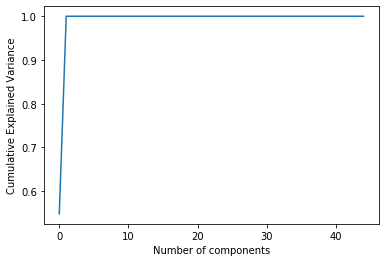

In [80]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
features = range(pca.n_components_)
print(pca.explained_variance_ratio_)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')

plt.show()



In [81]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_test)
RFC_Accuracy = accuracy_score(y_test, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_test, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

cv_scores_test= cross_val_score(RFC_Model,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(RFC_Model,X_train,y_train,cv=5,scoring='roc_auc')
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation cross validation scores: ' +str(cv_scores_std_rf))

Accuracy: 0.8834068544282321
AUC: 0.5028050821343456
Mean cross validation test score: 0.961465228632848
Mean cross validation train score: 0.9733715569712386
Standard deviation cross validation scores: 0.004488467117278635


In [82]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_test)
LR_Accuracy = accuracy_score(y_test, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_Model.score(X_test, y_test)

cv_scores_test= cross_val_score(LR_Model,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(LR_Model,X_train,y_train,cv=5,scoring='roc_auc')
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation cross validation scores: ' +str(cv_scores_std_rf))

Accuracy: 0.48910756701730573
Mean cross validation test score: 0.919298532983327
Mean cross validation train score: 0.8357695385926853
Standard deviation cross validation scores: 0.0035416305358726943


In [83]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_test)
KNN_Accuracy = accuracy_score(y_test, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

cv_scores_test= cross_val_score(KNN_Model,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(KNN_Model,X_train,y_train,cv=5,scoring='roc_auc')
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation cross validation scores: ' +str(cv_scores_std_rf))

Accuracy: 0.0998982015609094
Mean cross validation test score: 0.8520196556216177
Mean cross validation train score: 0.9243051011306516
Standard deviation cross validation scores: 0.008528576334528176


In [84]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_test)
DT_Accuracy = accuracy_score(y_test, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

cv_scores_test= cross_val_score(DT_Model,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(DT_Model,X_train,y_train,cv=5,scoring='roc_auc')
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation cross validation scores: ' +str(cv_scores_std_rf))

Accuracy: 0.0998982015609094
Mean cross validation test score: 0.8176959959299259
Mean cross validation train score: 0.8296734289257467
Standard deviation cross validation scores: 0.013327513597569212


In [85]:
AB_Model = AdaBoostClassifier()
AB_Model.fit(X_train, y_train)
AB_Predict = AB_Model.predict(X_test)
AB_Accuracy = accuracy_score(y_test, AB_Predict)
print("Accuracy: " + str(AB_Accuracy))

cv_scores_test= cross_val_score(AB_Model,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(AB_Model,X_train,y_train,cv=5,scoring='roc_auc')
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation cross validation scores: ' +str(cv_scores_std_rf))

Accuracy: 0.0998982015609094
Mean cross validation test score: 0.952373818400806
Mean cross validation train score: 0.9581822301759043
Standard deviation cross validation scores: 0.003877375176702086


In [87]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 'RandomForestClassifier',
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier','AdaBoostClassifier'
                                                      ],
                                            'Accuracy': [LR_Accuracy,
                                                         RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy,AB_Accuracy
                                                         ]})


In [88]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
1,RandomForestClassifier,0.883407
0,LogisticRegression,0.489108
2,KNeighborsClassifier,0.099898
3,DecisionTreeClassifier,0.099898
4,AdaBoostClassifier,0.099898


In [32]:
param_grid = {'bootstrap': [True],
 'max_depth': [10, 40],
 'max_features': [2, 3],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [600, 1000]}
rf = RandomForestClassifier()
rf_cv= GridSearchCV(rf,param_grid,cv=5)
rf_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [33]:
rf_cv.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [36]:
RFC_Model = RandomForestClassifier(bootstrap= True,
 max_depth= 40,
 max_features= 2,
 min_samples_leaf= 4,
 min_samples_split= 5,
 n_estimators=1000)


RFC_Model.fit(X_train, y_train)
y_pred = RFC_Model.predict(X_test)
RFC_Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_test, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

cv_scores_test= cross_val_score(RFC_Model,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(RFC_Model,X_train,y_train,cv=5,scoring='roc_auc')
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation cross validation scores: ' +str(cv_scores_std_rf))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: 0.9036308109942314
AUC: 0.5007666351091906
Mean cross validation test score: 0.9556586609404831
Mean cross validation train score: 0.9644738976941442
Standard deviation in cv scores: 0.004080273949602221
Mean Absolute Error: 0.09636918900576857
Mean Squared Error: 0.09636918900576857
Root Mean Squared Error: 0.3104338721946569


In [48]:
df = pd.read_csv('Data.csv')
df = df.drop(['popularity','artist_name','track_name','track_id'],axis=1)
df = df[df['genre']=='Rap']
df = pd.get_dummies(df)
df.head()

X = df.drop(['popular_not-popular','popular_popular'],axis=1)
y = df['popular_popular']
print(X.columns)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

scaler = StandardScaler() 
X_trained = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_test)
RFC_Accuracy = accuracy_score(y_test, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_test, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'lognorm_duration', 'Count', 'genre_Rap', 'key_A', 'key_A#',
       'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F',
       'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor',
       'time_signature_0/4', 'time_signature_1/4', 'time_signature_3/4',
       'time_signature_4/4', 'time_signature_5/4',
       'bucket_(100000.0, 300000.0]', 'bucket_(300000.0, 500000.0]',
       'bucket_(500000.0, 700000.0]', 'bucket_(700000.0, 900000.0]'],
      dtype='object')
Accuracy: 0.9978343259339469
AUC: 0.5


                        Features  Importance scores
0                     Unnamed: 0           0.000000
1                   acousticness           0.000013
2                   danceability           0.000237
3                    duration_ms           0.000261
4                         energy           0.000598
5               instrumentalness           0.000776
6                       liveness           0.001063
7                       loudness           0.001142
8                    speechiness           0.001369
9                          tempo           0.001404
10                       valence           0.001421
11              lognorm_duration           0.001537
12                         Count           0.001555
13             genre_Alternative           0.001557
14                   genre_Blues           0.001599
15                 genre_Country           0.001619
16                   genre_Dance           0.001621
17                   genre_Indie           0.001686
18          

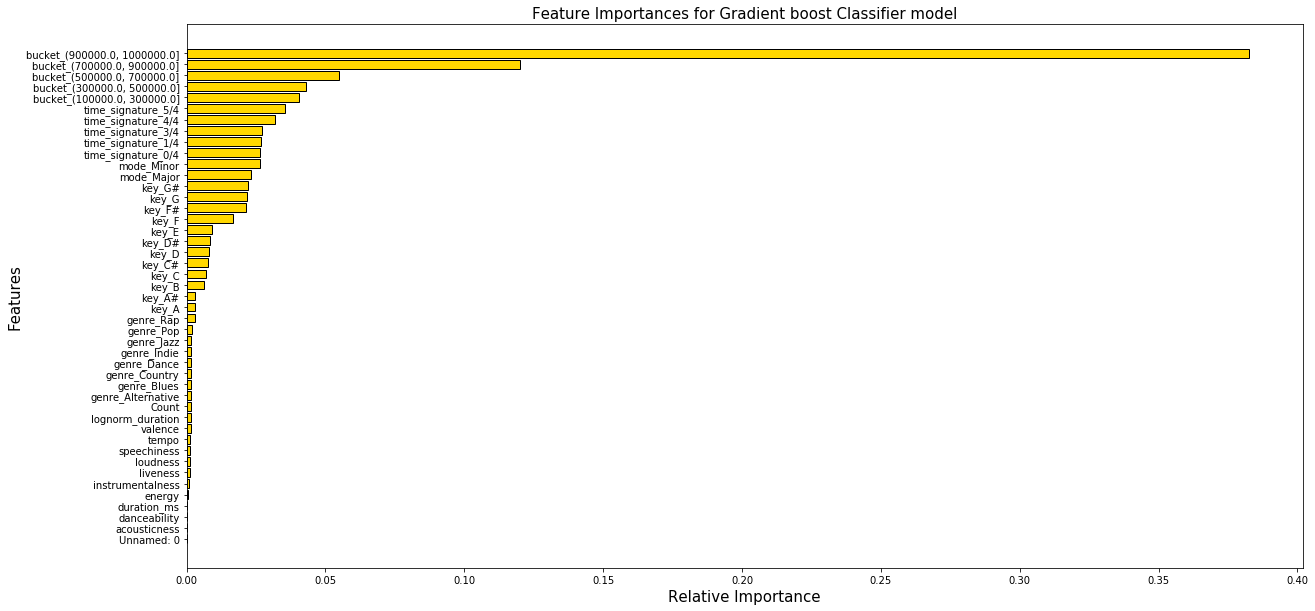

In [111]:
features = X
importances = list(RFC_Model.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#visually:
plt.figure(figsize=(20,10))
#indices = np.argsort(importances)
index = [0,1,
2,
3,
4,
5,
6,
7,
8,
9,
10,
11,
12,
13,
14,
15,
16,
17,
18,
19,
20,
21,
22,
23,
24,
25,
26,
27,
28,
29,
30,
31,
32,
33,
34,
35,
36,
37,
38,
39,
40,
41,
42,
43,
44]
_=plt.barh(index,imp, align='center',color='gold',edgecolor='k')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Gradient boost Classifier model',fontsize=15)g

plt.show()

